In [1]:
from random import randint
import matplotlib.pyplot as plt
import time
import numpy as np

In [47]:
def Find_Max_Crossing_Subarray(a, low, mid, high):
    
    left_sum = a[mid]
    left_index = mid
    s = a[mid]
    for i in range(mid - 1, low - 1, -1):
        s += a[i]
        if s > left_sum:
            left_sum = s
            left_index = i
    
    right_sum = a[mid + 1]
    right_index = mid + 1
    s = a[mid + 1]
    for i in range(mid + 2, high + 1):
        s += a[i]
        if s > right_sum:
            right_sum = s
            right_index = i
    
    return (left_index, right_index, left_sum + right_sum)


def Find_Max_Subarray_1(a, low, high):
    
    """Complexity O(nlog(n))"""
    
    if low == high:
        return (low, high, a[low])
    else:
        mid = (low + high) // 2
        (left_index_1, left_index_2, left_sum) = Find_Max_Subarray_1(a, low, mid)
        (right_index_1, right_index_2, right_sum) = Find_Max_Subarray_1(a, mid + 1, high)
        (mid_index_1, mid_index_2, mid_sum) = Find_Max_Crossing_Subarray(a, low, mid, high)
        
        if left_sum >= mid_sum and left_sum >= right_sum:
            return(left_index_1, left_index_2, left_sum)
        elif right_sum >= mid_sum and right_sum >= left_sum:
            return(right_index_1, right_index_2, right_sum)
        else:
            return(mid_index_1, mid_index_2, mid_sum)
        
        


In [39]:
def Find_Max_Subarray_2(a, low, high):
    
    """Complexity O(n^2)"""
    
    n = high - low + 1
    max_s = a[low]
    left_index = low
    right_index = high
    s = 0
    for i in range(n):
        s = 0
        for j in range(i, n):
            s += a[j]
            if s > max_s:
                max_s = s
                left_index = i
                right_index = j
            
            
    return(left_index, right_index, max_s)

In [4]:
def Find_Max_Subarray_3(a, low, high):
    
    """Algorithm uses FMS_2 (O(n^2)) when n <= n_0 and FMS_1 when n > n_0"""
    
    n0 = 60
    if low - high + 1 <= n0:
        return Find_Max_Subarray_2(a, low, high)
    else:
        mid = (low + high) // 2
        (left_index_1, left_index_2, left_sum) = Find_Max_Subarray_1(a, low, mid)
        (right_index_1, right_index_2, right_sum) = Find_Max_Subarray_1(a, mid + 1, high)
        (mid_index_1, mid_index_2, mid_sum) = Find_Max_Crossing_Subarray(a, low, mid, high)
        
        if left_sum >= mid_sum and left_sum >= right_sum:
            return(left_index_1, left_index_2, left_sum)
        elif right_sum >= mid_sum and right_sum >= left_sum:
            return(right_index_1, right_index_2, right_sum)
        else:
            return(mid_index_1, mid_index_2, mid_sum)

In [5]:
def Find_Max_Subarray_4(a, low, high):
    
    """Complexity O(n)"""
    s = 0
    max_s = a[low]
    left_index = low
    right_index = high
    for i in range(low, high + 1):
        s += a[i]
        if s > max_s:
            max_s = s
            right_index = i
        elif s < 0:
            s = 0
            left_index = i + 1
    return(left_index, right_index, max_s)

In [6]:
Find_Max_Subarray_1.__doc__

'Complexity O(nlog(n))'

In [7]:
Find_Max_Subarray_2.__doc__

'Complexity O(n^2)'

In [8]:
Find_Max_Subarray_3.__doc__

'Algorithm uses FMS_2 (O(n^2)) when n <= n_0 and FMS_1 when n > n_0'

In [9]:
Find_Max_Subarray_4.__doc__

'Complexity O(n)'

In [52]:
a = [1, -5, 3, -3, -2, 56, 2, -1]
#a = list(range(10))
print(a)
print( Find_Max_Subarray_1(a, 0, len(a) - 1) )
print( Find_Max_Subarray_2(a, 0, len(a) - 1) )
print( Find_Max_Subarray_3(a, 0, len(a) - 1) )
print( Find_Max_Subarray_4(a, 0, len(a) - 1) )

[1, -5, 3, -3, -2, 56, 2, -1]
(5, 6, 58)
(5, 6, 58)
(5, 6, 58)
(5, 6, 58)


In [61]:
n = 1000000
print( Find_Max_Subarray_4(list(range(n)), 0, len(list(range(n))) - 1) )

(0, 999999, 499999500000)


In [30]:
N = 100
t1 = []
t2 = []
t3 = []
t4 = []
array = []
tt = time.time()
for n in range(1, N + 1):
    
    array += [n]
    start_time = time.time()
    #Find_Max_Subarray_1(array, 0, len(array) - 1)
    time_1 = time.time() - start_time
    
    start_time = time.time()
    #Find_Max_Subarray_2(array, 0, len(array) - 1)
    time_2 = time.time() - start_time
    
    start_time = time.time()
    #Find_Max_Subarray_3(array, 0, len(array) - 1)
    time_3 = time.time() - start_time
    
    start_time = time.time()
    Find_Max_Subarray_4(array, 0, len(array) - 1)
    time_4 = time.time() - start_time
    
    t1.append(time_1)
    t2.append(time_2)
    t3.append(time_3)
    t4.append(time_4)

print("--- %s seconds ---" % (time.time() - tt))

--- 66.2249276638031 seconds ---


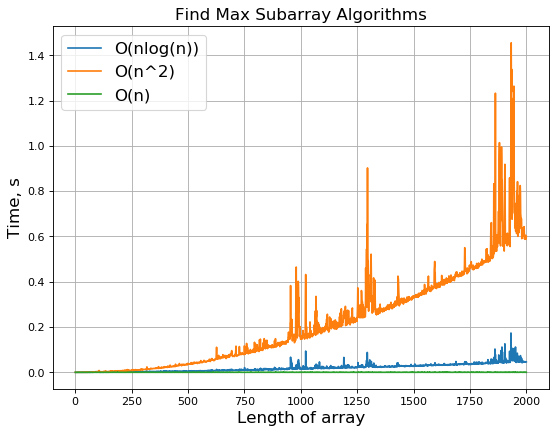

In [579]:
plt.figure(num=None, figsize = (8, 6), dpi = 80)

p1 = plt.plot(range(1, N + 1), t1) # O(nlog(n))
p2 = plt.plot(range(1, N + 1), t2) # O(n^2)
p4 = plt.plot(range(1, N + 1), t4) # O(n)

plt.title('Find Max Subarray Algorithms', fontsize = 15)
plt.xlabel('Length of array', fontsize = 15)
plt.ylabel('Time, s', fontsize = 15)

plt.grid()
plt.legend((p1[0], p2[0], p4[0]),('O(nlog(n))', 'O(n^2)', 'O(n)'), fontsize = 15)
plt.show()

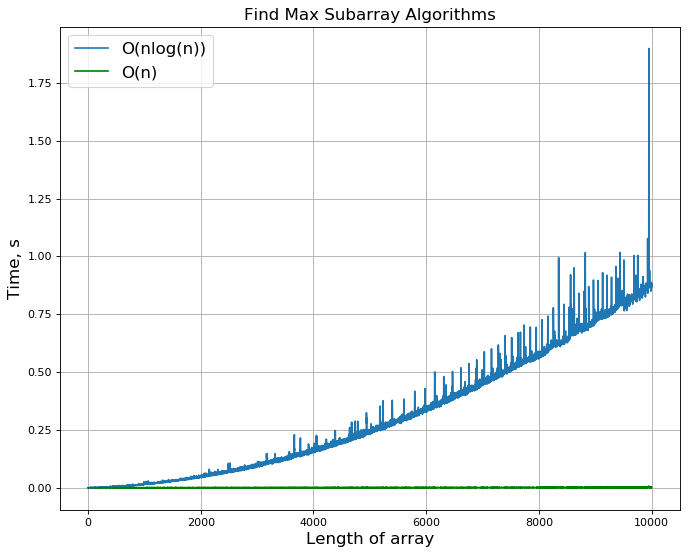

In [592]:
plt.figure(num=None, figsize=(10, 8), dpi=80)

p1 = plt.plot(range(1, N + 1), t1)
p4 = plt.plot(range(1, N + 1), t4, color = 'green')

plt.title('Find Max Subarray Algorithms', fontsize = 15)
plt.xlabel('Length of array', fontsize = 15)
plt.ylabel('Time, s', fontsize = 15)

plt.grid()
plt.legend((p1[0], p4[0]),('O(nlog(n))', 'O(n)'), fontsize = 15)
plt.show()

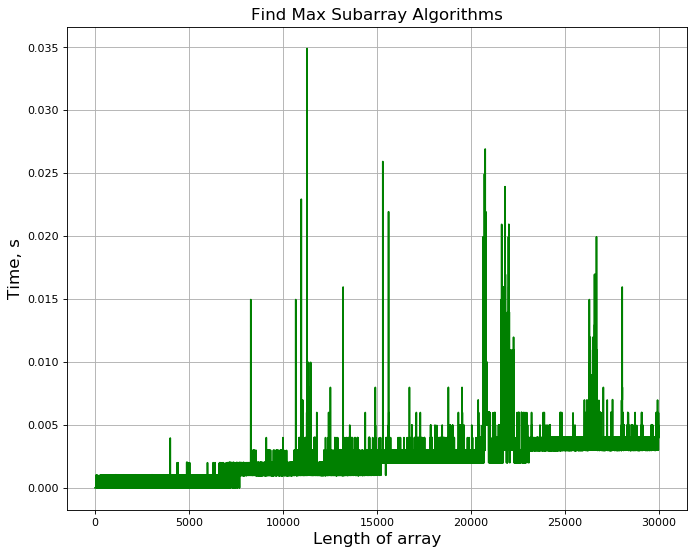

In [31]:
plt.figure(num=None, figsize=(10, 8), dpi=80)

p4 = plt.plot(range(1, N + 1), t4, color = 'green')

plt.title('Find Max Subarray Algorithms', fontsize = 15)
plt.xlabel('Length of array', fontsize = 15)
plt.ylabel('Time, s', fontsize = 15)

plt.grid()
#plt.legend((p4[0]), ( 'O(n)'), fontsize = 15)
plt.show()